In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util

In [2]:
test_1 = np.ones((45, 45))

error = 0.5 * np.random.rand(45, 45)
test_2 = np.ones((45, 45))
test_2 += error

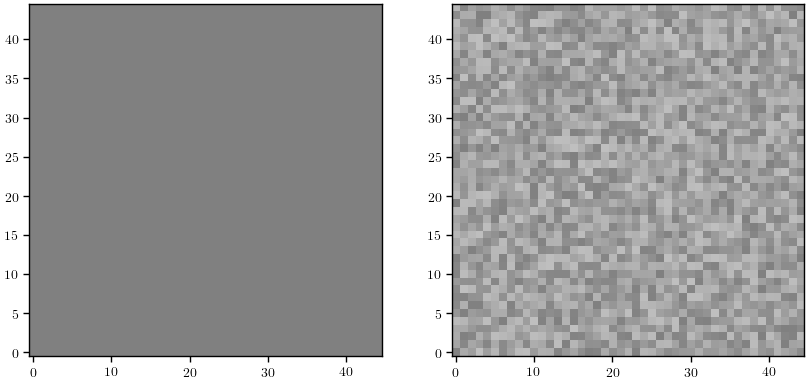

In [3]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(test_1, cmap='gray', vmin=0, vmax=2)
ax[1].imshow(test_2, cmap='gray', vmin=0, vmax=2)
plt.show()

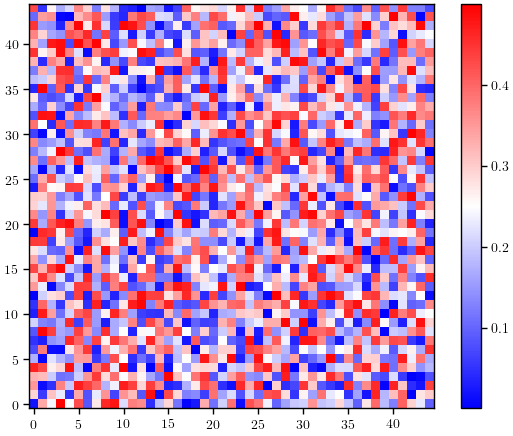

In [4]:
plot.plot(error, cmap='bwr', colorbar=True)

In [5]:
def chi2_distance(A, B):
    chi = 0.5 * np.sum([((a - b) ** 2) / (a + b) 
                      for (a, b) in zip(A, B)])
    return chi

def chi_square(observed, expected):
    return (((observed - expected) ** 2) / expected ** 2).sum().sum()

def chi_square_test(a, b):
    assert a.shape == b.shape, 'Arrays must have the same shape'

    chi2 = 0
    for i, j in zip(a, b):
        for k, l in zip(i, j):
            chi2 += (k - l) ** 2 / (l ** 2)
    
    return chi2

In [6]:
a = np.array([[1, 2], 
              [3, 4]])
b = np.array([[5, 6], 
              [7, 8]])

chi_square_test(a, b)

1.6609750566893422

In [7]:
print(chi2_distance(test_1, test_2))
print(chi_square(test_2, test_1))
print(chi_square_test(test_1, test_2))

35.73000233408795
169.45451192963077
91.0419449739202


In [8]:
print(chi2_distance(test_1, test_1))
print(chi_square(test_1, test_1))

0.0
0.0


In [9]:
error_factors = np.linspace(0, 1, 1000)
chi2 = []
chi = []

for factor in error_factors:
    test_1 = np.ones((45, 45))
    error = (np.random.rand(45, 45) - (0.5 * np.ones((45, 45)))) * factor
    test_2 = np.ones((45, 45)) + error
    chi2.append(chi2_distance(test_1, test_2))
    chi.append(chi_square(test_2, test_1))

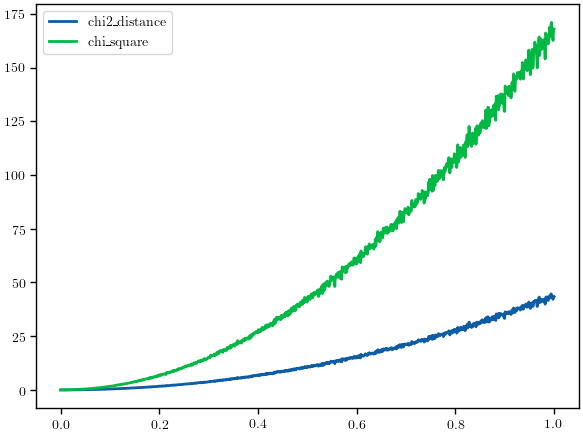

In [10]:
plt.plot(error_factors, chi2, label='chi2_distance')
plt.plot(error_factors, chi, label='chi_square')
plt.legend()
plt.show()

In [14]:
print(a.shape)
print(a)
print(a.flatten())

(2, 2)
[[1 2]
 [3 4]]
[1 2 3 4]


In [16]:
print(b.shape)
print(b)
print(b.flatten())
print(b.flatten().shape)

(2, 2)
[[5 6]
 [7 8]]
[5 6 7 8]
(4,)


In [17]:
print(b.ndim, b.flatten().ndim)

2 1


In [18]:
def chi_square(a, b):
    assert a.shape == b.shape, 'Arrays must have the same shape'

    chi2 = 0
    for i, j in zip(a, b):
        for k, l in zip(i, j):
            chi2 += ((k - l) ** 2) / l
    
    return np.nan_to_num(chi2, copy=False)

In [19]:
def chi_square_test(a, b):
    assert a.shape == b.shape, 'Arrays must have the same shape'

    if a.ndim != 1:
        a = a.flatten()
        b = b.flatten()

    chi2 = 0
    for i, j in zip(a, b):
        chi2 += ((i - j) ** 2) / j
    
    return np.nan_to_num(chi2, copy=False)

In [21]:
print(chi_square(a, b))
print(chi_square_test(a, b))

assert np.isclose(chi_square(a, b), chi_square_test(a, b))  # should be True

10.152380952380952
10.152380952380952
